In [4]:
import pickle
import numpy as np
import numpy.linalg as npl
from matplotlib import pyplot as plt
import math
from scipy.io import loadmat
import tables, numpy, json
from sklearn.decomposition import PCA
import os
import cv2 as cv

In [2]:
folder='part-3/ct0141'
fmag=open(folder+'/ct0141-magnitude','rb')
fang=open(folder+'/ct0141-angle','rb')

In [5]:
magnitude= pickle.load(fmag)
angle=pickle.load(fang)


In [124]:
folder='data/ct0141_arg0466d_128.mat'
f=tables.open_file(folder)
f.list_nodes # Show all variables available
#print(f)
X = f.get_node('/rawStims')[:] # load activity
responses=f.get_node('/psths')[:][0] # load activity
f.close()


In [7]:


X=magnitude.reshape(magnitude.shape[0],128*128)
X=X.astype('float')


In [8]:
print(X.shape)

(22000, 16384)


In [ ]:
pca_dims = min(400, X.shape[1])  
pca = PCA(n_components=pca_dims)
pca.fit(X)

In [128]:
res=np.zeros((400,1))
n=0

In [129]:
for file in os.listdir('data'):
    file='data'+'/'+str(file)
    f=tables.open_file(file)
    responses=f.get_node('/psths')[:][0] # load activity
    f.close()
    for i in range(400):
        res[i]+=responses[i]
    n+=1

In [130]:
print(n)

45


In [131]:
print(res)

[[16.66666684]
 [20.16666669]
 [20.33333346]
 [23.36666678]
 [15.70000006]
 [18.8666669 ]
 [24.20000021]
 [19.16666675]
 [18.06666681]
 [16.50000024]
 [13.16666692]
 [19.36666681]
 [17.83333331]
 [15.86666678]
 [15.20000012]
 [23.16666669]
 [20.40000013]
 [18.33333349]
 [22.28333332]
 [19.58333349]
 [19.50000024]
 [17.41666675]
 [15.99999994]
 [25.58333343]
 [18.33333343]
 [15.8333334 ]
 [14.83333346]
 [15.95000009]
 [14.11666672]
 [15.08333331]
 [13.33333343]
 [17.16666675]
 [12.83333346]
 [12.00000009]
 [ 9.66666678]
 [17.33333349]
 [13.16666681]
 [12.50000012]
 [11.66666675]
 [10.16666672]
 [15.33333352]
 [12.83333346]
 [20.86666687]
 [11.8333334 ]
 [14.66666669]
 [12.99999997]
 [10.36666672]
 [11.        ]
 [10.36666678]
 [15.66666672]
 [15.66666687]
 [11.86666669]
 [13.63333344]
 [12.53333341]
 [14.8333334 ]
 [17.00000003]
 [14.00000009]
 [15.66666684]
 [20.00000012]
 [16.16666675]
 [18.53333347]
 [19.36666684]
 [17.00000006]
 [23.30000004]
 [20.20000012]
 [15.99999988]
 [16.66666

In [132]:
print(res[np.where(np.isnan(res)==False)].shape)

(302,)


In [133]:
activated=res[np.where(np.isnan(res)==False)]
non=res[np.where(np.isnan(res))]

In [134]:
activated=activated/n

In [135]:
print(activated)

[0.37037037 0.44814815 0.45185185 0.51925926 0.34888889 0.41925926
 0.53777778 0.42592593 0.40148148 0.36666667 0.2925926  0.43037037
 0.3962963  0.3525926  0.33777778 0.51481482 0.45333334 0.40740741
 0.49518518 0.43518519 0.43333334 0.38703704 0.35555555 0.56851852
 0.40740741 0.35185185 0.32962963 0.35444445 0.3137037  0.33518518
 0.2962963  0.38148148 0.28518519 0.26666667 0.21481482 0.38518519
 0.2925926  0.27777778 0.25925926 0.22592593 0.34074074 0.28518519
 0.46370371 0.26296296 0.32592593 0.28888889 0.23037037 0.24444444
 0.23037037 0.34814815 0.34814815 0.2637037  0.30296297 0.27851852
 0.32962963 0.37777778 0.31111111 0.34814815 0.44444445 0.35925926
 0.41185185 0.43037037 0.37777778 0.51777778 0.44888889 0.35555555
 0.37037037 0.50370371 0.41481481 0.35185185 0.32962963 0.27111111
 0.36888889 0.3        0.31185185 0.32222223 0.20740741 0.37407408
 0.28148148 0.29444444 0.26296297 0.28888889 0.33333333 0.37037037
 0.35740741 0.37222222 0.29814815 0.36296296 0.30185185 0.3259

In [253]:
res=np.nan_to_num(res)

In [199]:
X_train=X[:20]

Y_train=res[:20]
Y_train=Y_train.reshape(Y_train.shape[0],1)

In [211]:
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_
print(eigenvectors.shape)
print(eigenvalues.shape)

eigenvectors=eigenvectors[:X_train.shape[0],:]
eigenvalues=eigenvalues[:X_train.shape[0]]
print(eigenvectors.shape)

(400, 16384)
(400,)
(20, 16384)


In [201]:
reduced_X = pca.transform(X_train)


In [202]:
print(reduced_X.shape)

(20, 400)


In [262]:
Y_test=res[399]
X_test=X[399]

In [263]:
dx = (np. abs(Y_train - Y_test)). argmin()

In [264]:
n_avg = np.dot(reduced_X.T, (Y_train+0.0001))
print(n_avg.shape)
n_avg=n_avg[:X_train.shape[0]]

(400, 1)


In [265]:
for i in range(n_avg.shape[0]):
  n_avg[i, :] /= (np.sqrt(np.dot((Y_train[i]), (Y_train[i]).T)+0.0001))

In [266]:
cs = np.dot(X_train[dx].reshape(128*128,1), n_avg.T)/np.sqrt(np.dot((Y_test), (Y_test).T)+0.0001)

In [267]:
img = np.dot(cs,eigenvalues)
print(img.shape)

(16384,)


In [242]:
frame1=img.reshape((128,128))

In [153]:
frame2=img.reshape((128,128))

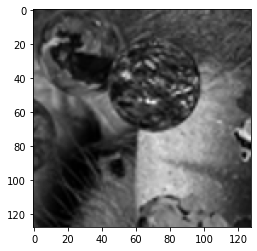

In [268]:
plt.imshow((img.reshape((128,128))), cmap='gray')

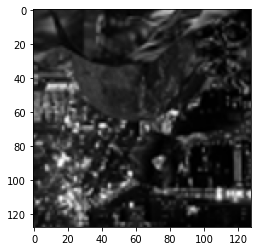

In [269]:
plt.imshow(X_test.reshape((128, 128)), cmap='gray')

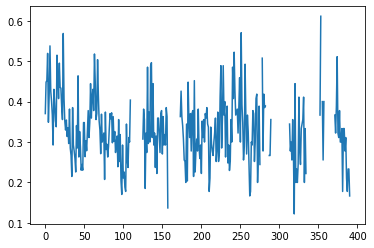

In [156]:
plt.plot(res/n)

In [165]:
def video(file,vid, frame):
    size = 128, 128
    duration = 10
    fps = 15
    
    output=file + '.mp4'
    out = cv.VideoWriter(output, cv.VideoWriter_fourcc(*'mp4v'), fps, (size[1], size[0]), False)
    
    for i in range(frame):
        d = vid[i]
        out.write(d)
    out.release()
    

In [166]:
frames=np.zeros((2,128,128))
frames[0]=frame1
frames[1]=frame2
video('trial',frames,2)

In [167]:
def compute(video,frames):
    # Source for this code: Geeks for Geeks
# The video feed is read in as
# a VideoCapture object
    i=0
    field_magnitude=np.zeros((frames,128,128))
    field_angle=np.zeros((frames,128,128))
    cap = cv.VideoCapture(video)
  
# ret = a boolean return value from
# getting the frame, first_frame = the
# first frame in the entire video sequence
    ret, first_frame = cap.read()
  
# Converts frame to grayscale because we
# only need the luminance channel for
# detecting edges - less computationally 
# expensive
    prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
  
# Creates an image filled with zero
# intensities with the same dimensions 
# as the frame
    mask = np.zeros_like(first_frame)
    fps=15
    size=[128,128] 
# Sets image saturation to maximum
    mask[..., 1] = 255
    image=None
    orig=None
    fl=None
    try:  
        while(cap.isOpened()):
      
    # ret = a boolean return value from getting
    # the frame, frame = the current frame being
    # projected in the video
            ret, frame = cap.read()
      
    # Opens a new window and displays the input
    # frame
            #cv.imshow("input", frame)
      
    # Converts each frame to grayscale - we previously 
    # only converted the first frame to grayscale
            gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
      
    # Calculates dense optical flow by Farneback method
            flow = cv.calcOpticalFlowFarneback(prev_gray, gray, 
                                       None,
                                       0.5, 3, 15, 3, 5, 1.2, 0)
      
    # Computes the magnitude and angle of the 2D vectors
            magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
            fl=magnitude, angle*180/np.pi/2
       
            
            #temp1=val1.resize(128**2,1)
            #temp2=val2.resize(128**2,1)
            field_magnitude[i]=fl[0]
            field_angle[i]=fl[1]

    # Sets image hue according to the optical flow 
    # direction
            mask[..., 0] = angle * 180 / np.pi / 2
      
    # Sets image value according to the optical flow
    # magnitude (normalized)
            mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
       
    # Converts HSV to RGB (BGR) color representation
            rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
       
    # Opens a new window and displays the output frame
       #cv.imshow("dense optical flow", rgb)
            image=rgb
            orig=gray
       #compute()
       #show()
    # Updates previous frame
            prev_gray = gray
            i=i+1
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
            if cv.waitKey(1) & 0xFF == ord('q'):
                break
    except:
        print("Video has ended.")
# The following frees up resources and
# closes all windows
    cap.release()
    cv.destroyAllWindows()
    return field_magnitude, field_angle

In [180]:
mag,ang=compute('trial.mp4',2)
print(ang[1])

Video has ended.
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [169]:
def comp(mag,ang):
#mt={'data': image, 'label': 'opticflow'}
#savemat('optic_flow.mat',mt)
   X=np.linspace(0,127,128)
   Y=np.linspace(0,127,128)
  
   mg=mag.reshape(128**2,1)
   ag=ang.reshape(128**2,1)
   plt.figure()
   x,y=np.meshgrid(X,Y)

   dx=np.zeros(128**2)
   dy=np.zeros(128**2)
   for i in range(128**2):
       dx[i]=mg[i][0]*math.cos(ag[i][0])
       dy[i]=mg[i][0]*math.sin(ag[i][0])

   plt.quiver(x,y,dx,dy)

   plt.show()

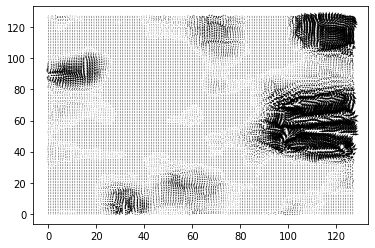

In [176]:
comp(mag[0],ang[0])